In [1]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Modules are imported")

Modules are imported


In [2]:
# Importing Dataset
df = pd.read_csv("C:\\Users\\paliw\\Downloads\\datasets\\covid19_Confirmed_dataset.csv")

# Print Top 5 Rows
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
# Shape of the data frame
df.shape

(266, 104)

In [4]:
# Delete useless columns
df.drop(["Lat", "Long"], axis =1, inplace = True)

In [5]:
# Delete useless columns
df.drop(["Province/State"], axis =1, inplace = True)

In [6]:
df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,Albania,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,Algeria,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,Andorra,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,Angola,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [7]:
# Aggregating rows by the country
df_aggregated = df.groupby("Country/Region").sum()

In [8]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [9]:
df_aggregated.shape

(187, 100)

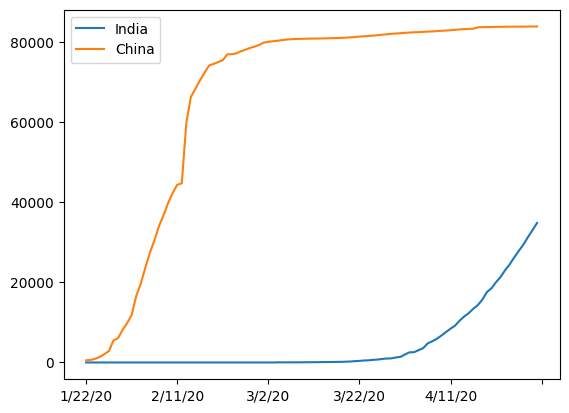

In [10]:
# Visualizing data related to country like India, China and US
df_aggregated.loc['India'].plot()
df_aggregated.loc['China'].plot()
plt.legend()

<Axes: >

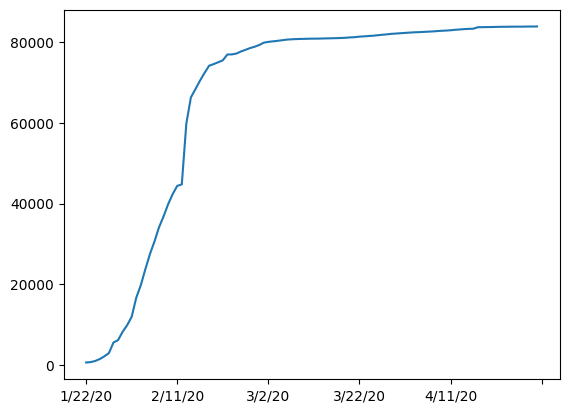

In [11]:
# Calculating a good measure
df_aggregated.loc["China"].plot()

<Axes: >

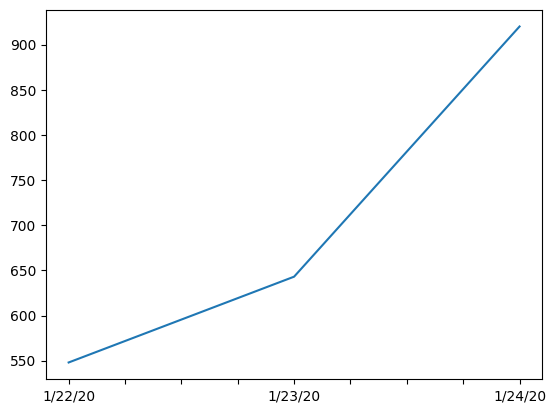

In [12]:
df_aggregated.loc["China"][:3].plot()

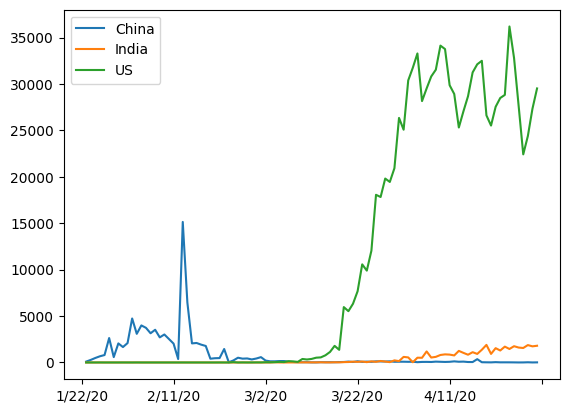

In [13]:
# Calulating and plotting the first derative of the curve
df_aggregated.loc["China"].diff().plot()
df_aggregated.loc["India"].diff().plot()
df_aggregated.loc["US"].diff().plot()
plt.legend()

In [14]:
# Find maximum infection rate for China, India and US
df_aggregated.loc["China"].diff().max()

15136.0

In [15]:
df_aggregated.loc["India"].diff().max()

1893.0

In [16]:
df_aggregated.loc["US"].diff().max()

36188.0

In [17]:
# Find maximum infection rate for all the countries
countries = list(df_aggregated.index)
max_infection_rates = []
for c in countries:
    max_infection_rates.append(df_aggregated.loc[c].diff().max())
df_aggregated["max_infection_rate"] = max_infection_rates

In [18]:
df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [19]:
# Creating new dataset with only needed columns
corona_data = pd.DataFrame(df_aggregated["max_infection_rate"])

In [20]:
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [21]:
# Importing Happiness dataset
happiness_data = pd.read_csv("C:\\Users\\paliw\\Downloads\\datasets\\worldwide_happiness_report.csv")
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
# Drop useless columns
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
happiness_data.drop(useless_cols, axis=1, inplace=True)
happiness_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [23]:
# Changing the indices of the dataframe
happiness_data.set_index("Country or region", inplace=True)
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [24]:
# Combining two datasets
# Covid19 Dataset and Happiness Dataset

In [25]:
# Covid19 dataset
corona_data.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [26]:
corona_data.shape

(187, 1)

In [27]:
# World Happiness Dataset
happiness_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [28]:
happiness_data.shape

(156, 4)

In [29]:
# using Inner JOIN to join the datset
data = corona_data.join(happiness_data, how="inner")
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [30]:
data.shape

(143, 5)

In [31]:
# Correlation Matrix
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


In [32]:
# Visualization of the Result
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

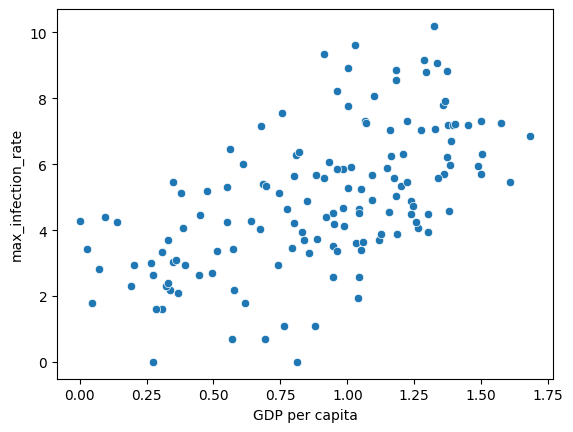

In [33]:
# Plotting GDP vs maximum infection rate
x1 = data["GDP per capita"]
y1 = data["max_infection_rate"]
sns.scatterplot(x = x1, y = np.log(y1), data=data)

<Axes: xlabel='GDP per capita', ylabel='max_infection_rate'>

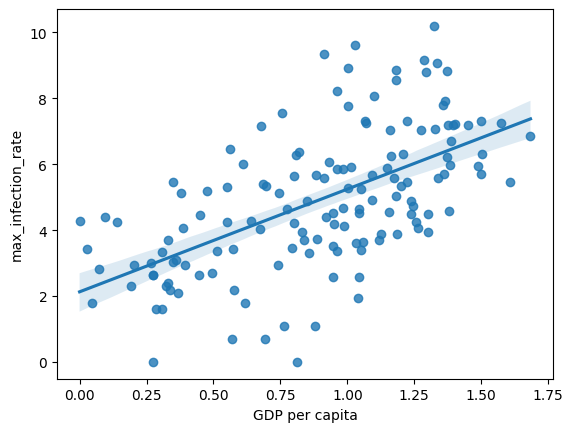

In [34]:
sns.regplot(x = x1,y = np.log(y1))

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

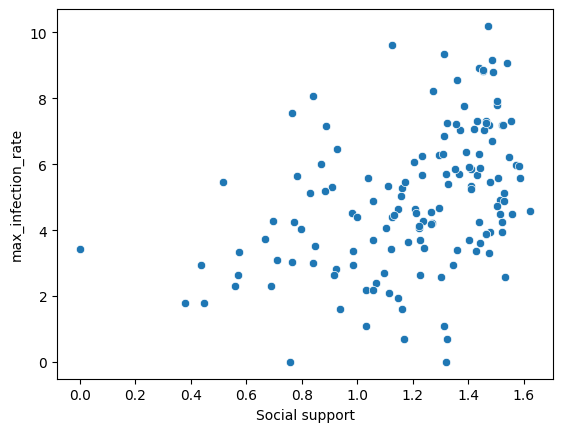

In [35]:
# Plotting Social Support vs maximum infection rate
x1 = data["Social support"]
y1 = data["max_infection_rate"]
sns.scatterplot(x = x1, y = np.log(y1), data=data)

<Axes: xlabel='Social support', ylabel='max_infection_rate'>

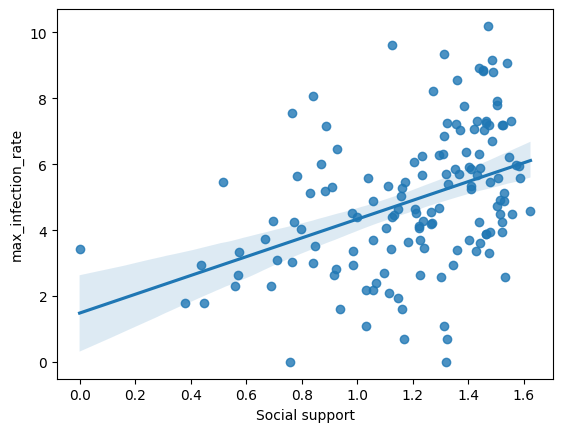

In [36]:
sns.regplot(x = x1,y = np.log(y1))

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

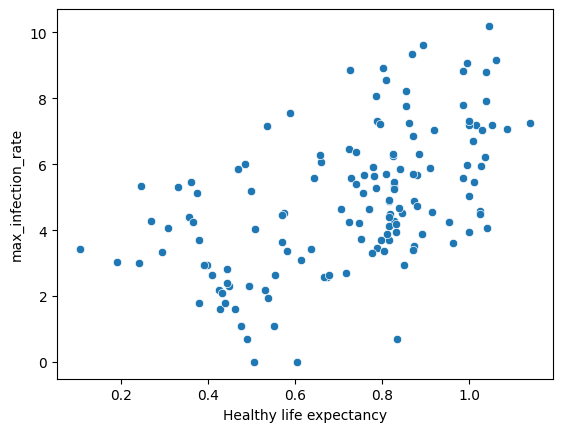

In [37]:
# Plotting Health life expectancy vs maximum infection rate
x1 = data["Healthy life expectancy"]
y1 = data["max_infection_rate"]
sns.scatterplot(x = x1, y = np.log(y1), data=data)

<Axes: xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

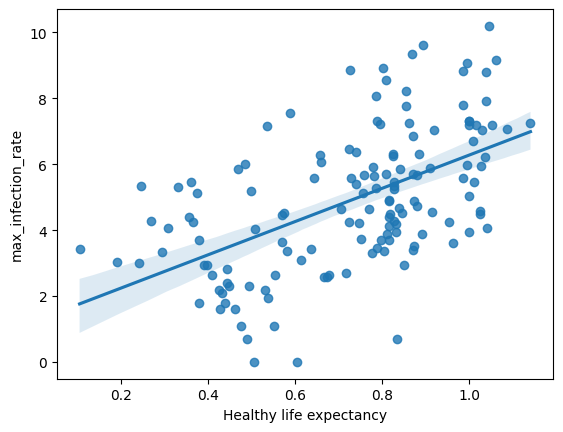

In [38]:
sns.regplot(x = x1,y = np.log(y1))